In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rupeshkent","key":"af7e1465a23f3935e20c1a7224d18894"}'}

In [2]:
# Creating the Directory

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Download Dogs-Vs-cats dataset from Kaggle
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:39<00:00, 22.8MB/s]
100% 812M/812M [00:39<00:00, 21.8MB/s]


In [4]:
#Unzip the dataset

!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

In [7]:
#Creating a new directory and Training, Validation & TestSubsets from the Original dataset
#Copying images to training, validation and test directories
import os
import shutil
import pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        try:
            os.makedirs(dir)
        except FileExistsError:
            pass
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [8]:
# Data Preprocessing
# Reading all the images using image_dataset_from_directory

from tensorflow.keras.utils import image_dataset_from_directory

train = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation= image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test= image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
#Instantiating a small convnet for dogs Vs. cats classification

from tensorflow import keras
from tensorflow.keras import layers

input_1 = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(input_1)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
output_1 = layers.Dense(1, activation="sigmoid")(x)
model_1 = keras.Model(inputs=input_1, outputs=output_1)

model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [10]:
#Configuring the model for training

model_1.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [11]:
#Creating a Tensorflow dataset containing random numbers using NumPy array(Understanding Tensorflow dataset objects)

import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)


In [12]:
#Creating the dataset
for i, element in enumerate(dataset):
  print(element.shape)
  if i>=2:
    break

(16,)
(16,)
(16,)


In [13]:
#Batching the dataset
batched_dset = dataset.batch(32)
for i, element in enumerate(batched_dset):
  print(element.shape)
  if i>=2:
    break

(32, 16)
(32, 16)
(32, 16)


In [14]:
#Reshaping the dataset
reshaped_dset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dset):
  print(element.shape)
  if i>=2:
    break

(4, 4)
(4, 4)
(4, 4)


In [15]:
#Displaying the shapes of the data and labels yielded by the Dataset

for data_batch, labels_batch in train:
  print("data batch shape: ", data_batch.shape)
  print("labels batch shape: ", labels_batch.shape)
  break

data batch shape:  (32, 180, 180, 3)
labels batch shape:  (32,)


In [17]:
callbacks_1 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

history_1 = model_1.fit(
    train,
    epochs=10,
    validation_data=validation,
    callbacks=callbacks_1)

Epoch 1/10
63/63 [==============================] - 12s 104ms/step - loss: 0.6973 - accuracy: 0.5025 - val_loss: 0.6911 - val_accuracy: 0.5330
Epoch 2/10
63/63 [==============================] - 6s 84ms/step - loss: 0.6964 - accuracy: 0.5390 - val_loss: 0.6799 - val_accuracy: 0.5550
Epoch 3/10
63/63 [==============================] - 5s 77ms/step - loss: 0.6659 - accuracy: 0.6025 - val_loss: 0.6196 - val_accuracy: 0.6720
Epoch 4/10
63/63 [==============================] - 7s 101ms/step - loss: 0.6211 - accuracy: 0.6545 - val_loss: 0.6366 - val_accuracy: 0.6290
Epoch 5/10
63/63 [==============================] - 4s 59ms/step - loss: 0.5904 - accuracy: 0.6810 - val_loss: 0.6186 - val_accuracy: 0.6400
Epoch 6/10
63/63 [==============================] - 7s 106ms/step - loss: 0.5689 - accuracy: 0.6905 - val_loss: 0.6164 - val_accuracy: 0.6380
Epoch 7/10
63/63 [==============================] - 4s 59ms/step - loss: 0.5433 - accuracy: 0.7075 - val_loss: 0.6478 - val_accuracy: 0.6620
Epoch 8/1

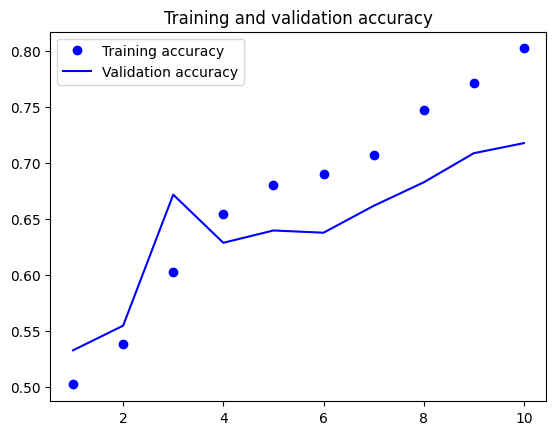

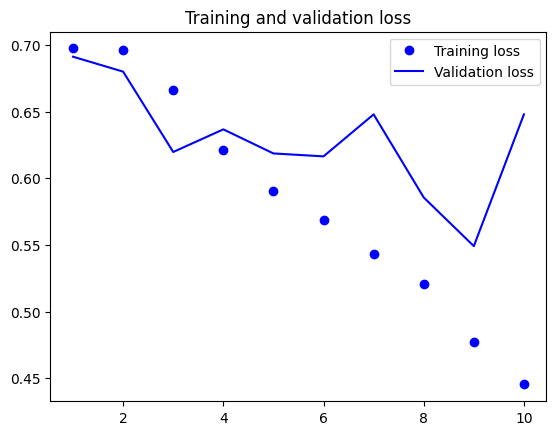

In [18]:
#For better visualization and understanding the curves of loss and accuracy during training were constructed

import matplotlib.pyplot as plt
accuracy = history_1.history["accuracy"]
val_accuracy = history_1.history["val_accuracy"]
loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [20]:
test_model_1 = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model_1.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 62ms/step - loss: 0.5730 - accuracy: 0.7010
Test accuracy: 0.701


:From the above we can conclude that the test accuracy is 70.1%

Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

In [21]:
#Using Data augmentation
#Copying images to training, validation, and test directories

import os, shutil, pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_2")

def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"
             for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname,
                      dst=dir / fname)

#Creating training, Test and validation sets.
#Training has 1500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [22]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        ]
)

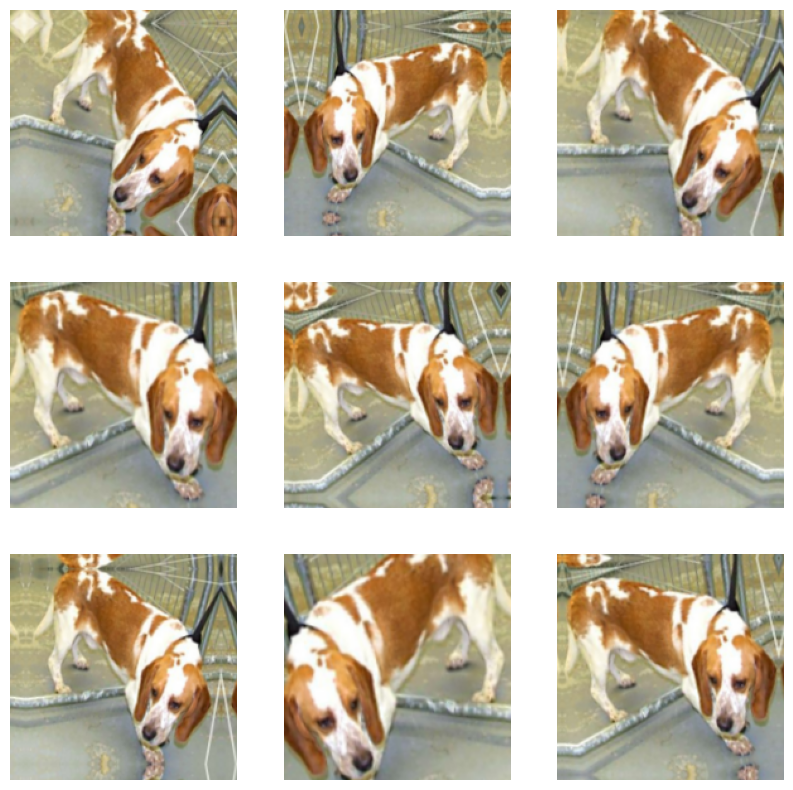

In [25]:
#Showing the augmented pictures of training dataset

plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [26]:
inputs = keras.Input(shape=(180, 180, 3))
y = data_augmentation(inputs)
y = layers.Rescaling(1./255)(y)
y = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(y)
y = layers.MaxPooling2D(pool_size=2)(y)
y = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(y)
y = layers.MaxPooling2D(pool_size=2)(y)
y = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(y)
y = layers.MaxPooling2D(pool_size=2)(y)
y = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(y)
y = layers.MaxPooling2D(pool_size=2)(y)
y = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(y)
y = layers.Flatten()(y)
y = layers.Dropout(0.5)(y)
outputs = layers.Dense(1, activation="sigmoid")(y)
model1 = keras.Model(inputs=inputs, outputs=outputs)

model1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [28]:
callback_1 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history1 = model1.fit(
    train,
    epochs=30,
    validation_data=validation,
    callbacks=callback_1)

Epoch 1/30
63/63 [==============================] - 8s 64ms/step - loss: 0.6975 - accuracy: 0.4950 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6937 - accuracy: 0.5185 - val_loss: 0.6913 - val_accuracy: 0.5580
Epoch 3/30
63/63 [==============================] - 7s 109ms/step - loss: 0.6800 - accuracy: 0.5830 - val_loss: 0.6581 - val_accuracy: 0.6280
Epoch 4/30
63/63 [==============================] - 5s 64ms/step - loss: 0.6640 - accuracy: 0.6155 - val_loss: 0.6368 - val_accuracy: 0.6530
Epoch 5/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6380 - accuracy: 0.6335 - val_loss: 0.6011 - val_accuracy: 0.6770
Epoch 6/30
63/63 [==============================] - 5s 77ms/step - loss: 0.6231 - accuracy: 0.6520 - val_loss: 0.5985 - val_accuracy: 0.6620
Epoch 7/30
63/63 [==============================] - 6s 89ms/step - loss: 0.6014 - accuracy: 0.6740 - val_loss: 0.6041 - val_accuracy: 0.6450
Epoch 8/30
6

In [29]:
#Evaluating the model on the test dataset

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 51ms/step - loss: 0.4735 - accuracy: 0.7870
Test accuracy: 0.787


Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

In [30]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

#Creating training, Test and validation sets.
#Training has 2000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [53]:
inputs3 = keras.Input(shape=(180, 180, 3))
z = data_augmentation(inputs3)
z = layers.Rescaling(1./255)(z)
z = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.Flatten()(z)
z = layers.Dropout(0.5)(z)
outputs2 = layers.Dense(1, activation="sigmoid")(z)
model1 = keras.Model(inputs=inputs3, outputs=outputs2)

model1.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [54]:
callback_2 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history1 = model1.fit(
    train,
    epochs=30,
    validation_data=validation,
    callbacks=callback_2)

Epoch 1/30
63/63 [==============================] - 6s 63ms/step - loss: 0.7043 - accuracy: 0.5060 - val_loss: 0.6924 - val_accuracy: 0.5110
Epoch 2/30
63/63 [==============================] - 7s 103ms/step - loss: 0.6930 - accuracy: 0.5095 - val_loss: 0.6840 - val_accuracy: 0.5460
Epoch 3/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6922 - accuracy: 0.5305 - val_loss: 0.6752 - val_accuracy: 0.5530
Epoch 4/30
63/63 [==============================] - 4s 67ms/step - loss: 0.6804 - accuracy: 0.5850 - val_loss: 0.6704 - val_accuracy: 0.5980
Epoch 5/30
63/63 [==============================] - 6s 95ms/step - loss: 0.6563 - accuracy: 0.6190 - val_loss: 0.6715 - val_accuracy: 0.5900
Epoch 6/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6798 - accuracy: 0.6310 - val_loss: 0.6286 - val_accuracy: 0.6480
Epoch 7/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6176 - accuracy: 0.6850 - val_loss: 0.6440 - val_accuracy: 0.6340
Epoch 8/30
6

In [35]:
test_model3 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model3.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.4895 - accuracy: 0.7820
Test accuracy: 0.782


Q4. Repeat Steps 1-3, but now using a pretrained network.The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

In [36]:
#Instantiating the VGG16 convolutional base

conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [37]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [39]:
#Extracting the VGG16 features and corresponding labels

import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train)
val_features, val_labels = get_features_and_labels(validation)
test_features, test_labels = get_features_and_labels(test)

1/1 [==============================] - 0s 24ms/step


In [42]:
#Defining and training the densely connected classifier

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/30
1/1 [==============================] - 1s 846ms/step - loss: 20.9018 - accuracy: 0.5625 - val_loss: 299.9849 - val_accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 182ms/step - loss: 147.1141 - accuracy: 0.6875 - val_loss: 71.1389 - val_accuracy: 0.8125
Epoch 3/30
1/1 [==============================] - 0s 206ms/step - loss: 28.3811 - accuracy: 0.9062 - val_loss: 11.4243 - val_accuracy: 0.8750
Epoch 4/30
1/1 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 11.4243 - val_accuracy: 0.8750
Epoch 5/30
1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 11.4243 - val_accuracy: 0.8750
Epoch 6/30
1/1 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 11.4243 - val_accuracy: 0.8750
Epoch 7/30
1/1 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 11.4243 - val_accuracy: 0.8

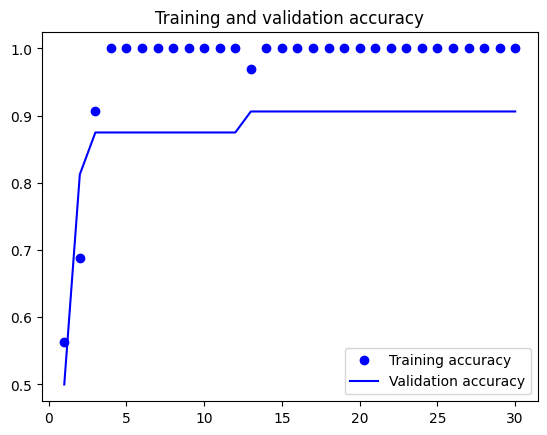

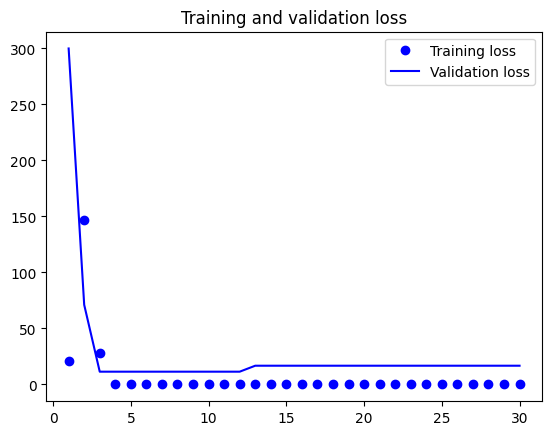

In [43]:
#Plotting the results

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [44]:
#Instantiating and freezing the VGG16 convolutional base

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))


conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [45]:
#Model is now performing with a classifier and agumentation to convulation base

augmentation2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

input22 = keras.Input(shape=(180, 180, 3))
x1 = augmentation2(input22)
x1 =keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(x1)
x1 = conv_base(x1)
x1 = layers.Flatten()(x1)
x1 = layers.Dense(256)(x1)
x1 = layers.Dropout(0.5)(x1)
outputs = layers.Dense(1, activation="sigmoid")(x1)
model = keras.Model(input22, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [47]:
callback4 = [
    keras.callbacks.ModelCheckpoint(
        filepath="features_extraction_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train,
    epochs=10,
    validation_data=validation,
    callbacks=callback4
)

Epoch 1/10
63/63 [==============================] - 18s 250ms/step - loss: 19.8134 - accuracy: 0.9025 - val_loss: 6.5040 - val_accuracy: 0.9590
Epoch 2/10
63/63 [==============================] - 11s 164ms/step - loss: 7.5077 - accuracy: 0.9410 - val_loss: 10.0419 - val_accuracy: 0.9620
Epoch 3/10
63/63 [==============================] - 11s 170ms/step - loss: 4.1962 - accuracy: 0.9610 - val_loss: 4.8444 - val_accuracy: 0.9730
Epoch 4/10
63/63 [==============================] - 11s 167ms/step - loss: 5.1552 - accuracy: 0.9615 - val_loss: 2.9491 - val_accuracy: 0.9770
Epoch 5/10
63/63 [==============================] - 10s 162ms/step - loss: 5.1015 - accuracy: 0.9595 - val_loss: 4.6154 - val_accuracy: 0.9760
Epoch 6/10
63/63 [==============================] - 10s 160ms/step - loss: 4.5666 - accuracy: 0.9635 - val_loss: 5.8776 - val_accuracy: 0.9700
Epoch 7/10
63/63 [==============================] - 10s 162ms/step - loss: 2.6910 - accuracy: 0.9740 - val_loss: 3.6102 - val_accuracy: 0.98

In [48]:
#Evaluating the model on the test set

test_model = keras.models.load_model(
    "features_extraction_with_augmentation2.keras",safe_mode=False)
test_loss, test_acc = test_model.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 96ms/step - loss: 3.9733 - accuracy: 0.9770
Test accuracy: 0.977


In [49]:
#Fine-tuning a pretrained model
#Freezing all layers until the fourth from the last

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False

In [50]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train,
    epochs=30,
    validation_data=validation,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 16s 197ms/step - loss: 2.4772 - accuracy: 0.9720 - val_loss: 2.5186 - val_accuracy: 0.9790
Epoch 2/30
63/63 [==============================] - 12s 191ms/step - loss: 1.0992 - accuracy: 0.9825 - val_loss: 2.2773 - val_accuracy: 0.9810
Epoch 3/30
63/63 [==============================] - 12s 188ms/step - loss: 1.2520 - accuracy: 0.9870 - val_loss: 2.3005 - val_accuracy: 0.9800
Epoch 4/30
63/63 [==============================] - 12s 185ms/step - loss: 0.8673 - accuracy: 0.9815 - val_loss: 1.8353 - val_accuracy: 0.9800
Epoch 5/30
63/63 [==============================] - 12s 190ms/step - loss: 0.5912 - accuracy: 0.9895 - val_loss: 1.8133 - val_accuracy: 0.9820
Epoch 6/30
63/63 [==============================] - 14s 212ms/step - loss: 0.7899 - accuracy: 0.9885 - val_loss: 1.5970 - val_accuracy: 0.9790
Epoch 7/30
63/63 [==============================] - 12s 182ms/step - loss: 0.5415 - accuracy: 0.9860 - val_loss: 1.6767 - val_accuracy: 0.9780

In [51]:
model_tuning = keras.models.load_model("fine_tuning.keras", safe_mode = False)
test_loss, test_acc = model.evaluate(test)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 99ms/step - loss: 1.2596 - accuracy: 0.9800
Test accuracy: 0.980
